<a href="https://colab.research.google.com/github/skryu9607/github-test/blob/main/computervision_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch as torch

In [2]:
x= torch.tensor(3.)
w= torch.tensor(4., requires_grad=True)
b= torch.tensor(5.,requires_grad=True)

In [3]:
y=x*w+b
y
y.backward()
print(x.grad)
print(w.grad)
print(b.grad)

None
tensor(3.)
tensor(1.)


In [4]:
import numpy as np
x = np.array([[1,2],[3,4]])
x
y=torch.tensor(x)
y
x.dtype, y.dtype

(dtype('int64'), torch.int64)

In [5]:
z=y.numpy()
z

array([[1, 2],
       [3, 4]])

In [6]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

In [7]:
#Download the Datasets
dataset_url="http://files.fast.ai/data/examples/cifar10.tgz"
download_url(dataset_url,'.')

  0%|          | 0/168168549 [00:00<?, ?it/s]

In [8]:
#Extract from archive
with tarfile.open('./cifar10.tgz','r:gz') as tar:
  tar.extractall(path='./data/examples')

In [9]:
data_dir='./data/examples/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'labels.txt', 'test']
['cat', 'truck', 'automobile', 'dog', 'airplane', 'horse', 'deer', 'bird', 'frog', 'ship']


In [10]:
airplane_files= os.listdir(data_dir + "/train/airplane")
print("NO. of training examples for airplanes:",len(airplane_files))
print(airplane_files[:5])

NO. of training examples for airplanes: 5000
['24113_airplane.png', '8200_airplane.png', '12492_airplane.png', '40867_airplane.png', '47486_airplane.png']


In [11]:
ship_test_files= os.listdir(data_dir + "/train/ship")
print("NO. of training examples for ship:",len(ship_test_files))
print(ship_test_files[:5])

NO. of training examples for ship: 5000
['26639_ship.png', '19775_ship.png', '19975_ship.png', '5280_ship.png', '13425_ship.png']


In [12]:
#We can use the ImageFolder class from torchvision to load the data as PyTorch tensors.
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [13]:
dataset = ImageFolder(data_dir + '/train', transform=ToTensor())

In [14]:
img, label = dataset[6000]
print(img.shape, label)
# 3 channel and 32 * 32 pixels -> (3, 32, 32)
img

torch.Size([3, 32, 32]) 1


tensor([[[0.0275, 0.0392, 0.0392,  ..., 0.2000, 0.1176, 0.1137],
         [0.0118, 0.0196, 0.0196,  ..., 0.1020, 0.1255, 0.1451],
         [0.0078, 0.0078, 0.0118,  ..., 0.1333, 0.1804, 0.1882],
         ...,
         [0.1333, 0.1255, 0.1176,  ..., 0.3176, 0.3451, 0.3137],
         [0.1333, 0.1294, 0.1333,  ..., 0.3059, 0.3412, 0.3451],
         [0.1490, 0.1490, 0.1490,  ..., 0.3059, 0.3255, 0.3373]],

        [[0.0667, 0.0784, 0.0784,  ..., 0.1961, 0.1059, 0.0902],
         [0.0471, 0.0549, 0.0549,  ..., 0.0941, 0.1137, 0.1216],
         [0.0314, 0.0353, 0.0392,  ..., 0.1255, 0.1647, 0.1647],
         ...,
         [0.1569, 0.1490, 0.1412,  ..., 0.2863, 0.3137, 0.2902],
         [0.1569, 0.1529, 0.1569,  ..., 0.2745, 0.3059, 0.3098],
         [0.1725, 0.1725, 0.1725,  ..., 0.2745, 0.2902, 0.2941]],

        [[0.0235, 0.0353, 0.0353,  ..., 0.2235, 0.1098, 0.0902],
         [0.0078, 0.0157, 0.0157,  ..., 0.1059, 0.1059, 0.1216],
         [0.0039, 0.0039, 0.0078,  ..., 0.1216, 0.1569, 0.

In [15]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [16]:
#we need to change order of torch tensor to visualize // (3,32,32)->(32,32,3)
import matplotlib.pyplot as plt
def show_example(img,label):
  print('Label: ', dataset.classes[label] ,"(" +str(label)+")")
  plt.imshow(img.permute(1,2,0))

Label:  airplane (0)


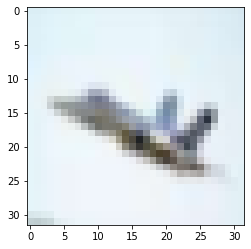

In [17]:
show_example(*dataset[0])

Label:  airplane (0)


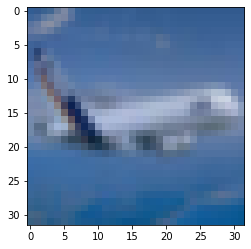

In [18]:
show_example(*dataset[1009])

# 1. Training set : used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent
# 2. Validation set - used to evaluate the model while training, adjust hyperparameters(learning rate etc.) and pick the best version of the model.
# 3. Test set - used to compare different models, or different types of modelling approaches, and report the final accuracy of the model.

In [19]:
def split_indices(n, val_pct=0.1, seed=99):
  #Determine size of validation set
  n_val = int(val_pct*n)
  #Set the random seed (for reproducibility)
  np.random.seed(seed)
  #Create random permutation of 0 to n-1 
  idxs = np.random.permutation(n)
  # Pick first n_val indices for validation set
  return idxs[n_val:], idxs[:n_val] # training set and validation set

In [20]:
val_pct = 0.2
rand_seed = 42
train_indices, val_indices = split_indices(len(dataset), val_pct, rand_seed)
print(len(train_indices),len(val_indices))
print('Sample validation indices: ', val_indices[:10])

40000 10000
Sample validation indices:  [33553  9427   199 12447 39489 42724 10822 49498  4144 36958]


We have randomly shuffled the indices, and selected a samll portion ( 20% ) to serve as the validation set. To process our data in small batches, we can now create PyTorch data loaders for each of these using a SubsetRandomSampler , which samples elements randomly from a given list of indices, while greating batches of data.


In [26]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
batch_size = 100

In [27]:
# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                      batch_size,
                      sampler=train_sampler)
# Validation sampler and data loader
val_sampler= SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,
                    batch_size,
                    sampler=val_sampler)


In [29]:
print(len(train_dl))

400


TypeError: ignored

We can look at batches of images from the dataset using the "make_grid" method from "torchvision" . Each time the following code is run, we get a different batch, since the sampler shuffles the indices before creating batches. 

In [32]:
from torchvision.utils import make_grid
def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(10,10)) 
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(make_grid(images, 10).permute(1,2,0))
    break


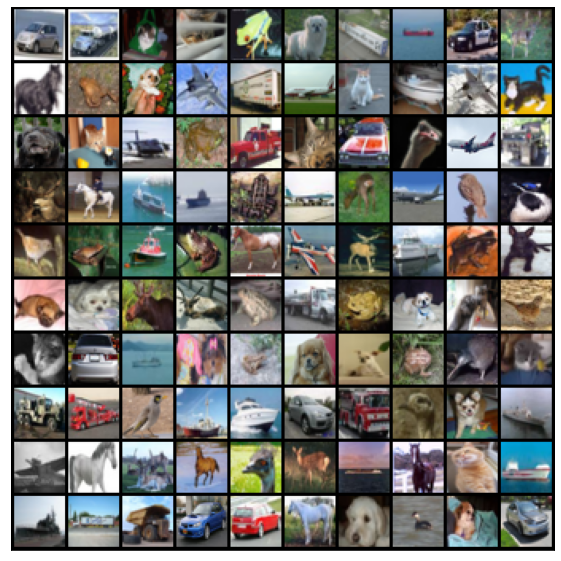

In [33]:
show_batch(train_dl)